In [1]:
#importing all of the modules


%pylab inline
import array
import argparse
import copy
import csv
import json
import struct
import sys
import urllib
import zipfile

from __future__ import division
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import scipy.io
import scipy.signal
from sklearn.metrics import r2_score
from sklearn import cross_validation
from sklearn import cluster
import seaborn as sns
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [27]:
#files are stored in /Users/SP/Documents/ABA_Human_Data/
#we have gene expression in 5 human subjects

#these are the id's of the human subjects
ids = ['9861','10021','12876','14380','15496','15697'];
i = 3;
#here's how we access the data:
dataPath = '/Users/SP/Documents/ABA_Human_Data/normalized_microarray_donor'+ids[i]+'/';
os.chdir(dataPath)
expression_file = 'MicroarrayExpression.csv';
sample_info_file = 'SampleAnnot.csv';
probe_file = 'Probes.csv';


with open(sample_info_file, 'rb') as f:
    reader = csv.reader(f)
    sample_info3 = list(reader)
    
with open(expression_file, 'rb') as f:
    reader = csv.reader(f)
    expression3 = list(reader)
    
with open(probe_file, 'rb') as f:
    reader = csv.reader(f)
    probes3 = list(reader)

    

NameError: name 's' is not defined

In [5]:
probe = 10
location = 10;

print "number of genes that they measured:"
print str(len(expression)) + '\n'

print "Information that we have about each gene"
print str(probes[0]) + '\n'

print "number of sampling sites"
print str(len(expression))
print str(len(expression[1])) + '\n';

print "this is the information that we have about each sample "
print str(sample_info[0])  + '\n'



print 'Gene x in location y'
print probes[probe];
print sample_info[location];
print expression[probe][location];



print "number of genes that they measured:"
print str(len(expression)) + '\n'

print "Information that we have about each gene"
print str(probes[0]) + '\n'

print "number of sampling sites"
print str(len(expression))
print str(len(expression[1])) + '\n';

print "this is the information that we have about each sample "
print str(sample_info[0])  + '\n'


probe = 10
location = 10;
print 'Gene x in location y'
print probes[probe];
print sample_info[location];
print expression[probe][location];

number of genes that they measured:
58692

Information that we have about each gene
['probe_id', 'probe_name', 'gene_id', 'gene_symbol', 'gene_name', 'entrez_id', 'chromosome']

number of sampling sites
58692
894

this is the information that we have about each sample 
['structure_id', 'slab_num', 'well_id', 'slab_type', 'structure_acronym', 'structure_name', 'polygon_id', 'mri_voxel_x', 'mri_voxel_y', 'mri_voxel_z', 'mni_x', 'mni_y', 'mni_z']

Gene x in location y
['1058676', 'CUST_6483_PI416261804', '741', 'C11orf9', 'chromosome 11 open reading frame 9', '745', '11']
['4346', '11', '5682', 'CX', 'BLA', 'basolateral nucleus, right', '992121', '78', '108', '75', '18.1', '1.6', '-22.1']
11.0589715912979


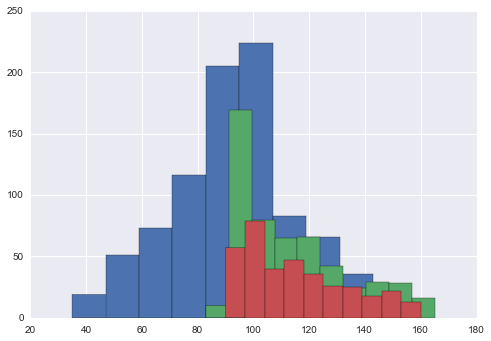

In [33]:
xvals_1 = np.array(sample_info);
#xvals_1 = xvals_1[1:,7];
xvals_1 = np.array([float(i) for i in xvals_1[1:,7]])
hist(xvals_1)

xvals_2 = np.array(sample_info2);
#xvals_1 = xvals_1[1:,7];
xvals_2 = np.array([float(i) for i in xvals_2[1:,7]])
hist(xvals_3) 
hist(xvals_2)

xvals_3 = np.array(sample_info3);
#xvals_1 = xvals_1[1:,7];
xvals_3 = np.array([float(i) for i in xvals_3[1:,7]])


In [12]:
print sample_info[0]
print sample_info[20]


['structure_id', 'slab_num', 'well_id', 'slab_type', 'structure_acronym', 'structure_name', 'polygon_id', 'mri_voxel_x', 'mri_voxel_y', 'mri_voxel_z', 'mni_x', 'mni_y', 'mni_z']
['4263', '17', '5707', 'CX', 'CA1', 'CA1 field, right', '1001646', '77', '89', '116', '19.5', '-42.4', '4.3']


In [21]:
a = np.array(sample_info)

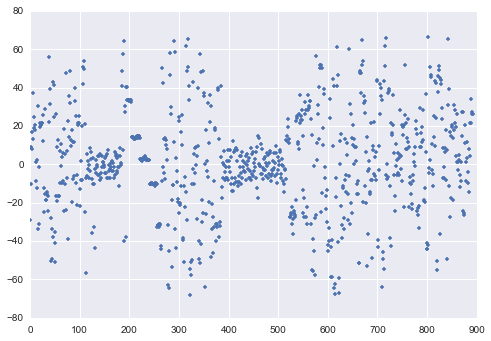

In [28]:
plot(a[1:,10],'.')

rvals = find(a>0);
lvals = find(a<0);

In [51]:

t = np.array([float(i) for i in a[1:,10]])
rvals = np.argwhere(t>0.0);
lvals = np.argwhere(t<0.0);
print len(rvals)
print len(lvals)

462
429


In [88]:
mygene = 831;
#print probes[10]
r_expression = [];
l_expression = [];

r_expression = [float(expression[mygene][i]) for i in rvals]
l_expression = [float(expression[mygene][i]) for i in lvals]

#print r_expression
mean_r = np.median(r_expression)
mean_l = np.median(l_expression)


print 'Mean expression of gene'+probes[mygene][4]
print mean_r
print mean_l


Mean expression of genedopamine receptor D2
16.0126454626
15.9996019385


In [87]:
for x in xrange(len(probes)):
    print x, probes[x][4]

0 gene_name
1 complement component 8, gamma polypeptide
2 complement component 9
3 complement component 9
4 mitochondrial ribosomal protein L49
5 mitochondrial ribosomal protein L49
6 mitochondrial ribosomal protein L49
7 zinc finger, HIT-type containing 2
8 zinc finger, HIT-type containing 2
9 metallophosphoesterase domain containing 2
10 chromosome 11 open reading frame 9
11 chromosome 11 open reading frame 9
12 chromosome 11 open reading frame 10
13 chromosome 11 open reading frame 10
14 diacylglycerol lipase, alpha
15 diacylglycerol lipase, alpha
16 chromosome 16 open reading frame 3
17 chromosome 16 open reading frame 3
18 formin-like 1
19 formin-like 1
20 pituitary tumor-transforming 1 interacting protein
21 pituitary tumor-transforming 1 interacting protein
22 chromosome 21 open reading frame 2
23 chromosome 21 open reading frame 2
24 transmembrane protein 50B
25 transmembrane protein 50B
26 carbonic anhydrase I
27 carbonic anhydrase I
28 carbonic anhydrase I
29 carbonic anhydra